In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/playTennis.csv')
data.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,weak,No
1,D2,Sunny,Hot,High,strong,No
2,D3,Overcast,Hot,High,weak,Yes
3,D4,Rain,Mild,High,weak,Yes
4,D5,Rain,Cool,Normal,weak,Yes


In [ ]:
df= data.drop(['Day'], axis=1)
df

,Outlook,Temperature,Humidity,Wind,PlayTennis,outlook_encoded,temp_encoded,humidity_encoded,wind_encoded,play_encoded
0,Sunny,Hot,High,weak,No,2,1,0,1,0
1,Sunny,Hot,High,strong,No,2,1,0,0,0
2,Overcast,Hot,High,weak,Yes,0,1,0,1,1
3,Rain,Mild,High,weak,Yes,1,2,0,1,1
4,Rain,Cool,Normal,weak,Yes,1,0,1,1,1
5,Rain,Cool,Normal,strong,No,1,0,1,0,0
6,Overcast,Cool,Normal,strong,Yes,0,0,1,0,1
7,Sunny,Mild,High,weak,No,2,2,0,1,0
8,Sunny,Cool,Normal,weak,Yes,2,0,1,1,1
9,Rain,Mild,Normal,weak,Yes,1,2,1,1,1


In [ ]:
le = LabelEncoder()
df['outlook_encoded']= le.fit_transform(df['Outlook'])
df['temp_encoded']= le.fit_transform(df['Temperature'])
df['humidity_encoded']= le.fit_transform(df['Humidity'])
df['wind_encoded']= le.fit_transform(df['Wind'])
df['play_encoded']= le.fit_transform(df['PlayTennis'])
print(df.head(5))

    Outlook Temperature Humidity    Wind PlayTennis  outlook_encoded  \
0     Sunny         Hot     High    weak         No                2   
1     Sunny         Hot     High  strong         No                2   
2  Overcast         Hot     High    weak        Yes                0   
3      Rain        Mild     High    weak        Yes                1   
4      Rain        Cool   Normal    weak        Yes                1   

   temp_encoded  humidity_encoded  wind_encoded  play_encoded  
0             1                 0             1             0  
1             1                 0             0             0  
2             1                 0             1             1  
3             2                 0             1             1  
4             0                 1             1             1  


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


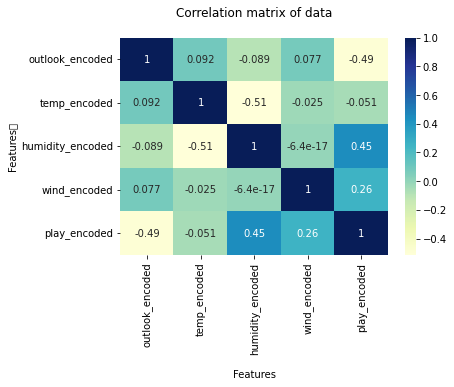

In [ ]:
# heatmap of correlation matrix with annotations in 2 different shades
import seaborn as sns #For plotting the dataset in seaborn
import matplotlib.pyplot as plt
cols=['outlook_encoded','temp_encoded','humidity_encoded','wind_encoded','play_encoded']
cor=data[cols].corr()
hm1 = sns.heatmap(cor, annot = True,cmap='YlGnBu')
hm1.set(xlabel='\nFeatures', ylabel='Features\t', title = "Correlation matrix of data\n")
plt.show()

In [ ]:
features=['outlook_encoded', 'temp_encoded', 'humidity_encoded','wind_encoded']
x=df[features]# since these are the features we take them as x
y=df['play_encoded']# since play is the output or label we'll take it as y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=1)
print("\nShape of x_train:\n{}".format(x_train.shape))
print("\nShape of x_test:\n{}".format(x_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))


Shape of x_train:
(11, 4)

Shape of x_test:
(3, 4)

Shape of y_train:
(11,)

Shape of y_test:
(3,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)
x_train=scaled_x_train
x_test=scaled_x_test
model = GaussianNB()
model.fit(x_train, y_train)
y_prediction= model.predict(x_test)
report=pd.DataFrame()
report['Actual values']=y_test
report['Predicted values']= y_prediction
print(report)


   Actual values  Predicted values
3              1                 1
7              0                 1
6              1                 1


[[0 1]
 [0 2]]


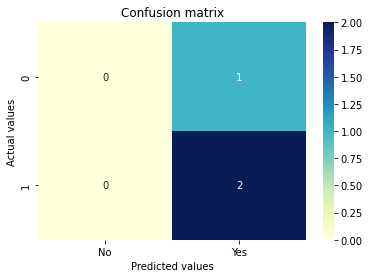

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score
ConfusionMatrix=confusion_matrix(y_test,y_prediction)
print(ConfusionMatrix)
ax=sns.heatmap(ConfusionMatrix,annot=True,cmap="YlGnBu")
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
#Ticket labels:
ax.xaxis.set_ticklabels(['No','Yes'])
ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()


In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
accuracy_nb = round(accuracy_score(y_test, Y_pred)*100, 2)
acc_gaussian = round(gaussian.score(x_train,y_train)*100 ,2)

In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy: %.3f' %accuracy)

Accuracy: 0.667
